In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
train = pd.read_csv("./input/train.csv")
depths = pd.read_csv("./input/depths.csv")

In [81]:
train.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [82]:
train[train.id == "429b289e07"]

,id,rle_mask
3931,429b289e07,1 6463 6465 98 6566 97 6667 95 6768 94 6869 93...


In [16]:
train.shape

(4000, 2)

In [15]:
(train["rle_mask"].isna()).sum()

1562

In [17]:
depths.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


In [22]:
df = pd.merge(train, depths, left_on="id", right_on="id")

In [23]:
df.head()

,id,rle_mask,z
0,575d24d81d,NaN,843
1,a266a2a9df,5051 5151,794
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,468
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,727
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,797


In [24]:
non_salt = df[df.rle_mask.isna()]

In [25]:
non_salt.shape

(1562, 3)

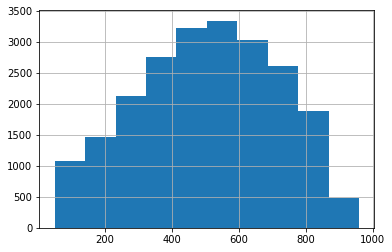

In [21]:
depths["z"].hist()

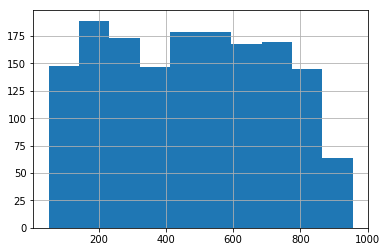

In [26]:
non_salt["z"].hist()

In [27]:
df["salt"] = 0

In [29]:
df["salt"] = df["salt"].where(df.rle_mask.isna(), 1)

In [30]:
df.head()

,id,rle_mask,z,salt
0,575d24d81d,NaN,843,0
1,a266a2a9df,5051 5151,794,1
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,468,1
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,727,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,797,1


In [49]:
dist = np.random.normal(0, 0.1, df.shape[0])
salt = df.salt + dist

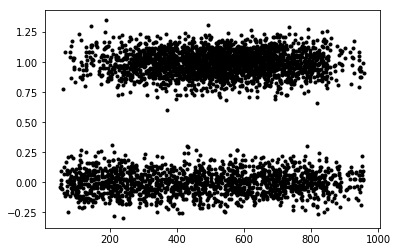

In [50]:
plt.plot(df.z, salt, "k.")

In [84]:
import dill

In [85]:
trn = dill.load(open("generated_data/train.pck", 'rb'))
mask = dill.load(open("generated_data/mask.pck", 'rb'))
test = dill.load(open("generated_data/test.pck", 'rb'))

In [86]:
train_id = dill.load(open("generated_data/train_id.pck", 'rb'))

In [87]:
trn.shape

(4000, 101, 101, 1)

In [88]:
img = []
msk = []
img.append(trn[0,:,:,0])
msk.append(mask[0,:,:,0])
img.append(trn[1000,:,:,0])
msk.append(mask[1000,:,:,0])
img.append(trn[2000,:,:,0])
msk.append(mask[2000,:,:,0])
img.append(trn[3000,:,:,0])
msk.append(mask[3000,:,:,0])

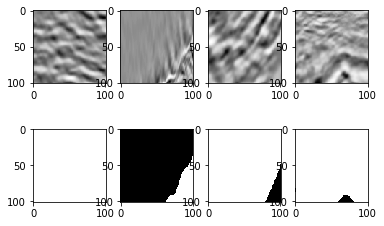

In [89]:
fig, axs = plt.subplots(2, 4)
for i, ax in enumerate(axs[0]):
    ax.imshow(img[i], cmap="Greys")
for i, ax in enumerate(axs[1]):
    ax.imshow(msk[i], cmap="Greys")

In [90]:
img[1], msk[1], train_id[1000]

(array([[0.5137255 , 0.52156866, 0.52156866, ..., 0.5529412 , 0.6313726 ,
         0.61960787],
        [0.52156866, 0.52156866, 0.52156866, ..., 0.5372549 , 0.6117647 ,
         0.6117647 ],
        [0.52156866, 0.52156866, 0.52156866, ..., 0.5294118 , 0.6       ,
         0.60784316],
        ...,
        [0.5137255 , 0.5137255 , 0.52156866, ..., 0.5568628 , 0.5137255 ,
         0.5294118 ],
        [0.50980395, 0.5137255 , 0.52156866, ..., 0.58431375, 0.54901963,
         0.5411765 ],
        [0.5058824 , 0.50980395, 0.52156866, ..., 0.6117647 , 0.5882353 ,
         0.56078434]], dtype=float32), array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]], dtype=float32), '429b289e07')

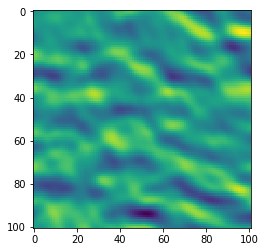

In [60]:
plt.imshow(img_sample)

In [102]:
m = msk[1].reshape(101 * 101, order="F")

In [103]:
m

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [114]:
counting = False
count = 0
seq = []
for i, c in enumerate(m):
    if c == 1 and counting:
        count = count + 1
    if c == 1 and not counting:
        seq.append(i + 1)
        count = 1
        counting = True
    if c == 0 and counting:
        seq.append(count)
        counting = False
" ".join(map(str, seq))      
        

'1 6463 6465 98 6566 97 6667 95 6768 94 6869 93 6970 92 7071 92 7172 92 7273 92 7374 92 7475 91 7576 90 7677 88 7778 85 7879 83 7980 80 8081 77 8182 74 8283 71 8384 68 8485 65 8586 62 8687 60 8788 58 8889 56 8990 55 9091 54 9192 54 9293 53 9394 52 9495 50 9596 49 9697 47 9798 45 9899 43 10000 41 10101 38'

In [110]:
print train[train.id == "429b289e07"]["rle_mask"]

3931    1 6463 6465 98 6566 97 6667 95 6768 94 6869 93...
Name: rle_mask, dtype: object


In [115]:
msk[1].sum()

9089.0

In [116]:
msk[0].sum()

0.0

In [117]:
mask[0].sum()

0.0

In [124]:
summary = mask.reshape(4000, 101 * 101)

In [126]:
salts = summary.sum(axis=1)

In [127]:
salts.shape

(4000,)

In [128]:
salts > 0

array([False,  True, False, ..., False,  True,  True])

In [141]:
coverage = salts / float(101 * 101)

In [142]:
salt_df = pd.DataFrame({"id": train_id, "salt": salts > 0, "coverage": coverage})

In [143]:
salt_df = salt_df.set_index("id")

In [162]:
salt_df["salt"] = salt_df["salt"].replace(True, 1)

In [163]:
salt_df[salt_df.salt == True].shape[0]

2438

In [165]:
salt_df[salt_df.salt == False].shape[0]

1562

In [167]:
salt_df.head()

,coverage,salt
id,,
000e218f21,0.000000,0.0
003c477d7c,0.032938,1.0
00441f1cf2,0.000000,0.0
0050766ae2,0.000000,0.0
005b452274,0.000000,0.0


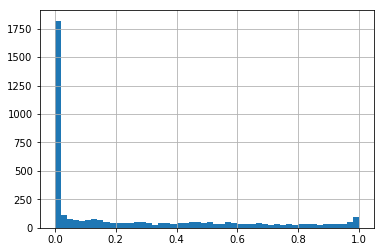

In [166]:
salt_df["coverage"].hist(bins=50)

In [168]:
with_salt = salt_df[salt_df.salt == True]

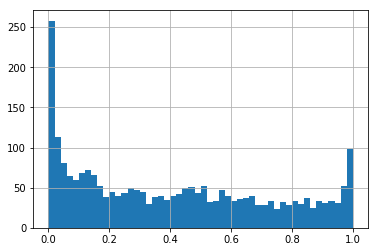

In [169]:
with_salt["coverage"].hist(bins=50)

In [170]:
from pandas.tools.plotting import scatter_matrix

/anaconda/envs/jupyter-py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f08a4d0>,
      dtype=object)

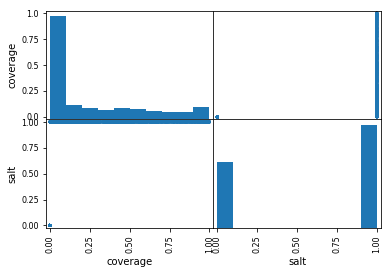

In [172]:
scatter_matrix(salt_df)